In [1]:
import pandas as pd	
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Datasets

- **Source**: [COVID-19 Dataset](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)
- **Author**: [DEVAKUMAR K. P.](https://www.kaggle.com/imdevskp)

### Context
- A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province
- People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.
- The virus has shown evidence of human-to-human transmission
- Transmission rate (rate of infection) appeared to escalate in mid-January 2020
- As of 30 January 2020, approximately 8,243 cases have been confirmed

### Content
- full_grouped.csv - Day to day country wise no. of cases (Has County/State/Province level data)
- covid_19_clean_complete.csv - Day to day country wise no. of cases (Doesn't have County/State/Province level data)
- country_wise_latest.csv - Latest country level no. of cases
- day_wise.csv - Day wise no. of cases (Doesn't have country level data)
- usa_county_wise.csv - Day to day county level no. of cases
- worldometer_data.csv - Latest data from https://www.worldometers.info/

## Loading

In [2]:
# directory to the data folder
data_path = "/kaggle/input/corona-virus-report"

print("Files in Dataset:")
os.listdir(data_path)

Files in Dataset:


['covid_19_clean_complete.csv',
 'country_wise_latest.csv',
 'day_wise.csv',
 'usa_county_wise.csv',
 'worldometer_data.csv',
 'full_grouped.csv']

In [3]:
df_full = pd.read_csv(os.path.join(data_path, 'full_grouped.csv'))
print("Shape:", df_full.shape)
df_full.head()

Shape: (35156, 10)


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [4]:
df_date = pd.read_csv(os.path.join(data_path, 'day_wise.csv'))
print("Shape:", df_date.shape)
df_date.head()

Shape: (188, 12)


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [5]:
df_country = pd.read_csv(os.path.join(data_path, 'country_wise_latest.csv'))
print("Shape:", df_country.shape)
df_country.head()

Shape: (187, 15)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


## Preprocessing

In [6]:
# 1. It converts date from string format to pandas datetime format
df_date.Date = df_date.Date.apply(pd.to_datetime)
df_full.Date = df_full.Date.apply(pd.to_datetime)

In [7]:
# 2. fill null values
df_date.fillna(0)

# 3. drop any columns
cols_to_dop = [
	# put the column names here
]
df_full.drop(cols_to_dop, axis=1)

# 4. GROUP: df_full to df_date
df_full.drop(['Country/Region', 'WHO Region'], axis=1).groupby("Date").mean()

# 5. GROUP: df_full to df_country
df_full.groupby('Country/Region').last()

"These steps are not applied but can be applied to alter graphs"

'These steps are not applied but can be applied to alter graphs'

## Basic Information

### df_full
This is the complete dataset with all countries and all dates

In [8]:
df_full.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [9]:
df_full.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [11]:
df_full.isna().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [12]:
fig = px.line(
	df_full.groupby("Date").count()['Country/Region'].reset_index(),
	x='Date', y='Country/Region',
              title='No of Countries for each Date',
              markers=True)
fig.show()

As we can see, there is no data missing for any day for any country. We can be confident in our graphs

### df_date
It contains data for each date and instead of a specific country, it considers data globally

In [13]:
df_date.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [14]:
df_date.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,188,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,2020-04-24 12:00:00,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
min,2020-01-22 00:00:00,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,2020-03-08 18:00:00,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2020-04-24 12:00:00,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,2020-06-10 06:00:00,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,2020-07-27 00:00:00,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000
std,NaN,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979


In [15]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    188 non-null    datetime64[ns]
 1   Confirmed               188 non-null    int64         
 2   Deaths                  188 non-null    int64         
 3   Recovered               188 non-null    int64         
 4   Active                  188 non-null    int64         
 5   New cases               188 non-null    int64         
 6   New deaths              188 non-null    int64         
 7   New recovered           188 non-null    int64         
 8   Deaths / 100 Cases      188 non-null    float64       
 9   Recovered / 100 Cases   188 non-null    float64       
 10  Deaths / 100 Recovered  188 non-null    float64       
 11  No. of countries        188 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory 

In [16]:
df_date.isna().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [17]:
print("Starting Date:", df_date.Date.min())
print("Ending Date:", df_date.Date.max())
print("Duration:", df_date.Date.max() - df_date.Date.min())

Starting Date: 2020-01-22 00:00:00
Ending Date: 2020-07-27 00:00:00
Duration: 187 days 00:00:00


In [18]:
df_date

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


### df_country
It contains the data for each country on the last date of record

In [19]:
df_country.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [20]:
df_country.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [21]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [22]:
df_country.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [23]:
print("Total No of Countries:", len(df_country['Country/Region'].unique()))

Total No of Countries: 187


In [24]:
df_country['WHO Region'].value_counts()

WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64

In [25]:
value_counts = df_country['WHO Region'].value_counts()
distribution_df = pd.DataFrame({'WHO Regions': value_counts.index, 'Countries': value_counts.values})
fig = px.bar(distribution_df, x='WHO Regions', y='Countries', title=f'No of Countries in Each Region')
fig.show()

# Visualization By Date
The Global View of Pandemic over time 

In [26]:
df = df_date.resample('1W-Mon', on='Date').mean().reset_index()

cols = {
	"Cases": ['Deaths', 'Recovered',	'Active'],
	"New": ['New deaths',	'New recovered'],
	"Per 100": ['Deaths / 100 Cases','Recovered / 100 Cases',	'Deaths / 100 Recovered'],
	"Number of Countries Affected": ['No. of countries'],
}

In [27]:
for col_title, col in cols.items():

    # Create a figure with multiple traces for each column
    fig = go.Figure()

    # Add traces for each column
    for c in col:
        fig.add_trace(go.Bar(x=df['Date'], y=df[c], name=c))

    # Customize the layout
    fig.update_layout(title=f'Rolling Sum for {col_title}',
                    xaxis_title='Date',
                    yaxis_title='Count',
                    template='plotly_dark',  # You can change the template based on your preference
                    barmode='stack',  # 'stack' for stacked bars, 'group' for grouped bars
                    )

    # Show the figure
    fig.show()

# Visualization By Country
Cases across different countries as of latest date

In [28]:
k = 5   # show only top k countries

# Sort DataFrame by 'Confirmed' column in descending order
df_country_sorted = df_country.sort_values(by='Confirmed', ascending=False)

# Select the top 10 countries
top_countries = df_country_sorted.head(k)

In [29]:
# Create a pie chart for the top 10 countries
fig = px.pie(top_countries, names='Country/Region', values='Confirmed',
             title=f'Top {k} Countries by Confirmed Cases',
             template='plotly_dark',  # You can change the template based on your preference
            )

# Show the figure
fig.show()

In [30]:
cols = {
	"Cases": ['Deaths', 'Recovered',	'Active'],
	"New": ['New deaths',	'New recovered'],
	"Per 100": ['Deaths / 100 Cases','Recovered / 100 Cases',	'Deaths / 100 Recovered'],
	"Week": ['Confirmed last week',	'1 week change'],
	"Last Week Percentage Increase": ['1 week % increase']
}

In [31]:
for col_title, col in cols.items():

    # Create a bar chart for multiple columns
    fig = px.bar(top_countries, x='Country/Region', y=col,
                title=f'Bar Comparison for top {k} Countires on {col_title}',
                template='plotly_dark',  # You can change the template based on your preference
                )

    # Show the figure
    fig.show()

# Visualization By Country Growth in Cases
This compares the cases across the countries over the time span

In [32]:
k = 6  # no of top countries
rolling = 4   # skips these many days

for col in df_full.columns:

    if col in ['Date', 'Country/Region', 'WHO Region']: continue

    date_sample = (df_full['Date'].dt.day % 2).isin([0])
    df = df_full[date_sample]

    top_countries = df.groupby('Country/Region')[col].max().sort_values(ascending=False).head(k).index

    # Filter the DataFrame for the top countries
    df = df[df['Country/Region'].isin(top_countries)]

    # Create an interactive bar plot using Plotly Express
    fig = px.bar(df, 
                x='Date', 
                y=col, 
                color='Country/Region', 
                title=f'Top {k} Countries in {col}',
                template="plotly_dark")

    # Customize the layout
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title=col,
        xaxis=dict(tickangle=45),
        legend_title='Country/Region'
    )

    # Show the interactive plot
    fig.show()

# Machine Learning
Applying Techinques of ML using scikit-learn to find hidden patterns and simliarities between the countries

## Preparation

Steps are taken to preprocess the data and convert tabular data to numpy vectors

In [33]:
countries = sorted(df_full['Country/Region'].unique())

print("Total Countries:", len(countries))
print("Country Names:", ", ".join(countries))

Total Countries: 187
Country Names: Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei, Bulgaria, Burkina Faso, Burma, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo (Brazzaville), Congo (Kinshasa), Costa Rica, Cote d'Ivoire, Croatia, Cuba, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Fiji, Finland, France, Gabon, Gambia, Georgia, Germany, Ghana, Greece, Greenland, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Holy See, Honduras, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kosovo, Kuwait, Kyrgyzstan, Laos, Latvia, Lebanon,

In [34]:
# Creating Vectors
group = df_full.groupby("Country/Region")
vectors = []
for country in countries:
	sub_group = group.get_group(country).drop(["Date", "Country/Region", "WHO Region"], axis=1)
	sub_group = sub_group.values
	sub_group = sub_group.ravel()
	vectors.append(sub_group)
vectors = np.vstack(vectors)
vectors.shape

(187, 1316)

In [35]:
# Scaling the Vectors
from sklearn.preprocessing import StandardScaler
vectors = StandardScaler().fit_transform(vectors)
vectors.shape

(187, 1316)

## Similarity Index
Finding how intense the similarities are found in data

In [36]:
# Similarity Matrix
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vectors, vectors)
sim.shape

(187, 187)

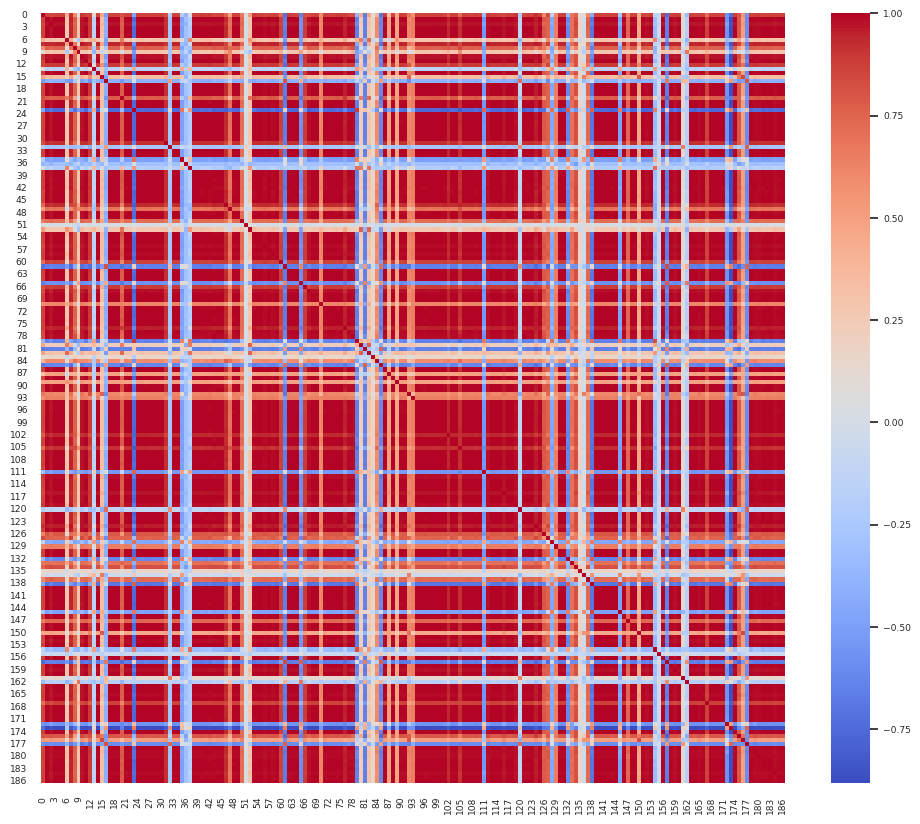

In [37]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.6)
sns.heatmap(sim, annot=False, cmap='coolwarm')

# Show the plot
plt.show()

The heatmap shows there is a significant similarity between countries

## Similar and Different Countries
Now that we input a country name, we get list of countries that had faced similar or completely cases over time

In [38]:
def find_similar_countries(country, k):
	i = countries.index(country)
	return [countries[j] for j in sim[i].argsort()[::-1][1:k+1]]

def find_opposite_countries(country, k):
	i = countries.index(country)
	return [countries[j] for j in sim[i].argsort()[1:k+1]]

def print_results(country, k):
	similar = find_similar_countries(country, k=k)
	opposite = find_opposite_countries(country, k=k)
	space = "\n\t - "

	print(f"Top {k} Countries that had cases similar to {country}:")
	print(space[1:] + space.join(similar))
	print(f"Top {k} Countries that had cases different to {country}:")
	print(space[1:] + space.join(opposite))

In [39]:
print_results("US", 10)

Top 10 Countries that had cases similar to US:
	 - United Kingdom
	 - Brazil
	 - France
	 - Russia
	 - Canada
	 - Spain
	 - India
	 - Peru
	 - Belgium
	 - Turkey
Top 10 Countries that had cases different to US:
	 - Taiwan*
	 - Albania
	 - San Marino
	 - Vietnam
	 - Brunei
	 - Uruguay
	 - Jordan
	 - Lebanon
	 - Georgia
	 - Cambodia


In [40]:
print_results("Saudi Arabia", 10)

Top 10 Countries that had cases similar to Saudi Arabia:
	 - Russia
	 - India
	 - Brazil
	 - Pakistan
	 - Chile
	 - Peru
	 - Qatar
	 - South Africa
	 - Turkey
	 - Belarus
Top 10 Countries that had cases different to Saudi Arabia:
	 - Iceland
	 - Malaysia
	 - New Zealand
	 - Croatia
	 - Taiwan*
	 - Luxembourg
	 - Hungary
	 - San Marino
	 - Andorra
	 - Vietnam
